In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as pyplot
import scipy.integrate as integrate

In [ ]:
HK = pd.read_csv('https://raw.githubusercontent.com/Kayx23/group-project/main/HK-output.csv')
#Ling Lu, import the csv data sheet into Pycharm 

In [ ]:
HK

,Date,cumulative-cases,cumulative-deaths,cumulative-recoveries,deaht-rate
0,2003-03-17,95.0,1.0,0.0,1.05%
1,2003-03-18,123.0,1.0,0.0,0.81%
2,2003-03-19,150.0,5.0,0.0,3.33%
3,2003-03-20,173.0,6.0,0.0,3.47%
4,2003-03-21,203.0,6.0,0.0,2.96%
...,...,...,...,...,...
112,2003-07-07,1755.0,298.0,1430.0,16.98%
113,2003-07-08,1755.0,298.0,1430.0,16.98%
114,2003-07-09,1755.0,298.0,1431.0,16.98%
115,2003-07-10,1755.0,298.0,1431.0,16.98%


In [ ]:
HK.columns
#Ling Lu, get the name for all columns

Index(['Date', 'cumulative-cases', 'cumulative-deaths',
       'cumulative-recoveries', 'deaht-rate'],
      dtype='object')

In [ ]:
HK['deaht-rate']
#Ling Lu, get the data for column named death-rate

0       1.05%
1       0.81%
2       3.33%
3       3.47%
4       2.96%
        ...  
112    16.98%
113    16.98%
114    16.98%
115    16.98%
116    16.98%
Name: deaht-rate, Length: 117, dtype: object

In [ ]:
# make PDF (daily new cases)
CDF_cases = 'cumulative-cases'
HK=HK.assign(PDF_cases = HK[CDF_cases]-HK[CDF_cases].shift(1))

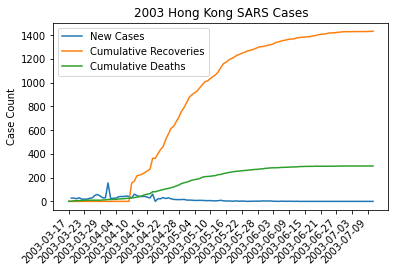

In [ ]:
#Ling Lu

# graph new cases, recovered cases, and deaths altogether

# handles
ax = pyplot.gca()  # get current axis
f = pyplot.gcf()   # get current figure

# plot
pyplot.plot(HK['Date'],HK['PDF_cases'])
pyplot.plot(HK['Date'],HK['cumulative-recoveries'])
pyplot.plot(HK['Date'],HK['cumulative-deaths'])

# adjust the number of x-axis ticks to show only some dates
ax.set_xticks(ax.get_xticks()[::6])
pyplot.xticks(rotation=45,ha='right')
# pyplot.rc('xtick', labelsize=8) # font size

# labels
pyplot.title("2003 Hong Kong SARS Cases")
pyplot.legend(["New Cases","Cumulative Recoveries","Cumulative Deaths"])
pyplot.ylabel("Case Count")

# export
f.subplots_adjust(bottom=0.23)  # making room for bottom labels
pyplot.savefig("figure2.1.1.png", dpi = 300)

pyplot.show()

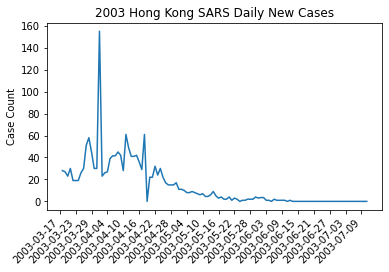

In [ ]:
#Ling Lu (whole session)

# just the infection curve 

ax = pyplot.gca()  # get current axis
f = pyplot.gcf()   # get current figure

# add HK data 
pyplot.plot(HK['Date'],HK['PDF_cases'])         # infected

ax.set_xticks(ax.get_xticks()[::6])
pyplot.xticks(rotation=45, ha='right')

# labels
pyplot.ylabel("Case Count")
pyplot.title("2003 Hong Kong SARS Daily New Cases")

# export
f.subplots_adjust(bottom=0.23)  # making room for bottom labels
pyplot.savefig("daily.png", dpi = 300)

pyplot.show()

### SIRD Model (FINAL MODEL)

In [ ]:
#Ling Lu, write the functions for equations that are used in SIRD model

# SIRD
def dS_dt(I,S,t): 
      return(-beta*I*S)

def dI_dt(I,S,t):
      return(beta*I*S - (gamma+mu)*I)

def dR_dt(I,t):
    return(gamma*I)

def dD_dt(I,t):
    return(mu*I)

def dN_dt(N,t):
    S,I,R, D = N
    return([dS_dt(I,S,t),
            dI_dt(I,S,t),
            dR_dt(I,t),
            dD_dt(I,t)])

In [ ]:
beta = 0.00042   # transmission rate
mu = 0.17  # death rate
gamma = 0.80823    # recovery rate  (this does not need to be this way)

# solver
ndays = 117
No = [2999+300,1,0,0] # IC 
t = np.linspace(0,ndays,117) 
Nfit = integrate.odeint(dN_dt,No,t) # solution 

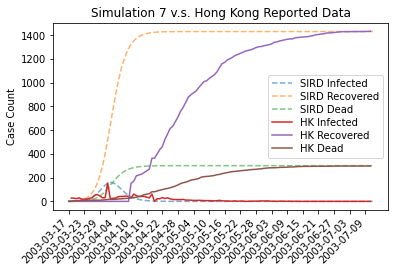

In [ ]:
#Ling Lu (this whole session)

# handles
ax = pyplot.gca()  # get current axis
f = pyplot.gcf()   # get current figure

# plotting SIR results 
# pyplot.plot(t,Nfit[:,0],'--',alpha=0.3)      # S
pyplot.plot(t,Nfit[:,1],'--',alpha=0.6)  # I
pyplot.plot(t,Nfit[:,2],'--',alpha=0.6)      # R
pyplot.plot(t,Nfit[:,3],'--',alpha=0.6)      # D

# add HK data 
pyplot.plot(HK['Date'],HK['PDF_cases'])
pyplot.plot(HK['Date'],HK['cumulative-recoveries'])
pyplot.plot(HK['Date'],HK['cumulative-deaths'])

# adjust the number of x-axis ticks to show only some dates
ax.set_xticks(ax.get_xticks()[::6])
pyplot.xticks(rotation=45, ha='right')

# labels
pyplot.ylabel("Case Count")
pyplot.title("Simulation 7 v.s. Hong Kong Reported Data")
pyplot.legend(["SIRD Infected","SIRD Recovered","SIRD Dead",
               "HK Infected","HK Recovered","HK Dead"],labelspacing=0.3)  # fontsize="small",ncol=1,

# export
f.subplots_adjust(bottom=0.23)  # making room for bottom labels
pyplot.savefig("final-model.png", dpi = 300)

pyplot.show()

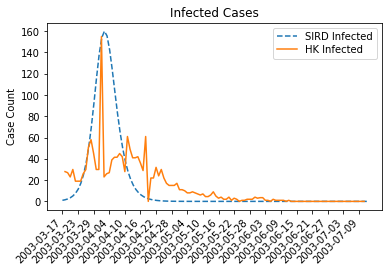

In [ ]:
# just the infection curve 

ax = pyplot.gca()  # get current axis
f = pyplot.gcf()   # get current figure

pyplot.plot(t,Nfit[:,1],'--')  # I

# add HK data 
pyplot.plot(HK['Date'],HK['PDF_cases'])         # infected

# adjust the number of x-axis ticks to show only some dates
ax.set_xticks(ax.get_xticks()[::6])
pyplot.xticks(rotation=45, ha='right')

# labels
pyplot.ylabel("Case Count")
pyplot.title("Infected Cases")
pyplot.legend(["SIRD Infected","HK Infected"],labelspacing=0.3)

# export
f.subplots_adjust(bottom=0.23)  # making room for bottom labels
pyplot.savefig("final-model-pdf.png", dpi = 300)

pyplot.show()

In [ ]:
print(np.array(HK['cumulative-recoveries'])[116] - Nfit[:,2][116]) # R
print(np.array(HK['cumulative-deaths'])[116] - Nfit[:,3][116]) # D
print(Nfit[:,1].max()-155) # peak

print(round(Nfit[:,1].sum()-1755,2))  # want this to be 1755

2.745210392991112
-2.8343098291225033
5.016691937006556
-0.05


In [ ]:
Nfit[:,1].max()

160.01669193700656

In [ ]:
HK['PDF_cases'].argmax()

15

### Simulations

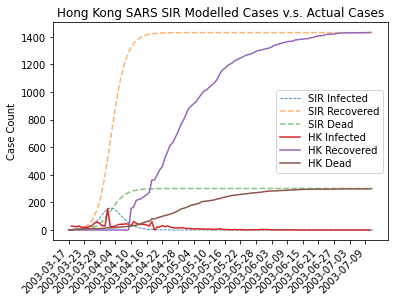

In [ ]:
beta = 0.00042   # transmission rate
mu = 0.17  # death rate
gamma = 0.808    # recovery rate  (this does not need to be this way)

# solver
ndays = 117
No = [2999+300,1,0,0] # IC 
t = np.linspace(0,ndays,117) 
Nfit = integrate.odeint(dN_dt,No,t) # solution 

# handles
ax = pyplot.gca()  # get current axis
f = pyplot.gcf()   # get current figure

# plotting SIR results 
# pyplot.plot(t,Nfit[:,0],'--',alpha=0.3)      # S
pyplot.plot(t,Nfit[:,1],'--',linewidth=0.8)  # I
pyplot.plot(t,Nfit[:,2],'--',alpha=0.6)      # R
pyplot.plot(t,Nfit[:,3],'--',alpha=0.6)      # D

# add HK data 
pyplot.plot(HK['Date'],HK['PDF_cases'])
pyplot.plot(HK['Date'],HK['cumulative-recoveries'])
pyplot.plot(HK['Date'],HK['cumulative-deaths'])

# adjust the number of x-axis ticks to show only some dates
ax.set_xticks(ax.get_xticks()[::6])
pyplot.xticks(rotation=45, ha='right')

#Ling Lu, add labels
pyplot.ylabel("Case Count")
pyplot.title("Hong Kong SARS SIR Modelled Cases v.s. Actual Cases")
pyplot.legend(["SIR Infected","SIR Recovered","SIR Dead",
               "HK Infected","HK Recovered","HK Dead"],labelspacing=0.3)  # fontsize="small",ncol=1,

pyplot.show()

In [ ]:
print(round(Nfit[:,1].sum()-1755,2))  # want this to be 1755
print(np.array(HK['cumulative-recoveries'])[116] - Nfit[:,2][116]) # R
print(np.array(HK['cumulative-deaths'])[116] - Nfit[:,3][116]) # D
# print(Nfit[:,1].max()-155) # peak

1.22
2.1220517213828316
-3.0510534744611846


In [ ]:
HK['PDF_cases'].argmax()

15

In [ ]:
Nfit[:,1].argmax()

16

PPT

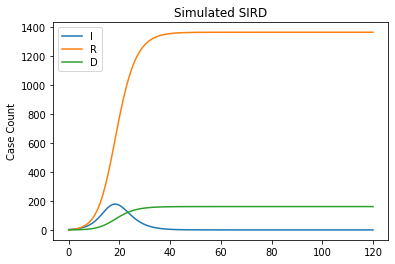

In [ ]:
beta = 0.00035   # transmission rate
mu = 0.06  # death rate
gamma = 0.508    # recovery rate  (this does not need to be this way)

# solver
ndays = 120
No = [2500,3,0,0] # IC 
t = np.linspace(0,ndays,117) 
Nfit = integrate.odeint(dN_dt,No,t) # solution 

# plotting SIR results 
pyplot.plot(t,Nfit[:,1])  # I
pyplot.plot(t,Nfit[:,2])      # R
pyplot.plot(t,Nfit[:,3])      # D
# pyplot.plot(t,Nfit[:,0])      # S


# labels
pyplot.ylabel("Case Count")
pyplot.title("Simulated SIRD")
pyplot.legend(["I","R","D"],labelspacing=0.3)  # fontsize="small",ncol=1,


# export
f.subplots_adjust(bottom=0.23)  # making room for bottom labels
pyplot.savefig("sim.png", dpi = 300)


pyplot.show()